  0%|          | 0/4 [00:00<?, ?it/s]

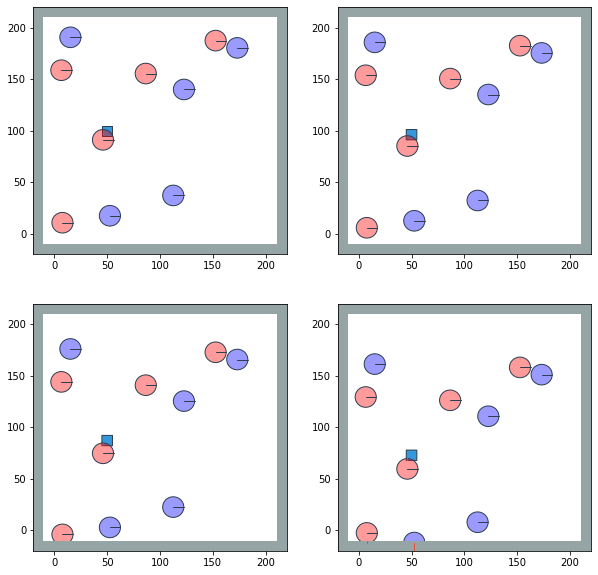

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pymunk               # Import pymunk..
import pymunk.matplotlib_util

from tqdm.notebook import tqdm


space = pymunk.Space()      # Create a Space which contain the simulation
space.gravity = 0,-1000     # Set its gravity

body = pymunk.Body(1,1666)  # Create a Body with mass and moment
body.position = 50,100      # Set the position of the body
shape = pymunk.Poly.create_box(body) # Create a box shape and attach to body
space.add(body, shape)       # Add both body and shape to the simulation

xmin, xmax, ymin, ymax = 0, 200, 0, 200
thick = 20
for a, b in zip([(xmin-thick, ymin-thick), (xmax+thick, ymin-thick), (xmax+thick, ymax+thick), (xmin-thick, ymax+thick)], 
                [(xmax+thick, ymin-thick), (xmax+thick, ymax+thick), (xmin-thick, ymax+thick), (xmin-thick, ymin-thick)]):
    body = pymunk.Body(body_type=pymunk.Body.STATIC)
    shape = pymunk.Segment(body, a, b, thick/2)
    space.add(body, shape)

for col in [(0, 0, 255, 100)]*5+[(255, 0, 0, 100)]*5:
    body = pymunk.Body(1, 1)
    body.position = tuple(np.random.uniform(0, 200, size=(2,)))
    shape = pymunk.Circle(body, 10)
    space.add(body, shape)
    shape.color = col

print_options = pymunk.SpaceDebugDrawOptions() # For easy printing

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for ax in tqdm(axs.flatten()):
    space.step(0.07)
    o = pymunk.matplotlib_util.DrawOptions(ax)
    space.debug_draw(o)
    scalex = (xmax-xmin)*.1
    scaley = (ymax-ymin)*.1
    ax.set_xlim(xmin-scalex, xmax+scalex);ax.set_ylim(ymin-scaley, ymax+scaley)
#     space.debug_draw(print_options) # Print the state of the simulation
plt.show()